In [1]:
%matplotlib inline
from math import e
import math
import numpy as np
from functools import partial
import matplotlib.pyplot as plt
from scipy.optimize import minimize

## Validation

In [55]:
in_dta = np.loadtxt('in.dta')
out_dta = np.loadtxt('out.dta')

In [56]:
in_dta[:3], out_dta[:3]

(array([[-0.77947021,  0.83822138,  1.        ],
        [ 0.15563491,  0.89537743,  1.        ],
        [-0.0599077 , -0.71777995,  1.        ]]),
 array([[-0.10600562, -0.08146703, -1.        ],
        [ 0.17792951, -0.34595141, -1.        ],
        [ 0.10216153,  0.71825825,  1.        ]]))

In [57]:
y_in = in_dta[:,2]
y_in[:5], '...'

(array([ 1.,  1.,  1.,  1., -1.]), '...')

In [58]:
y_out = out_dta[:,2]
y_out[:5], '...'

(array([-1., -1.,  1., -1.,  1.]), '...')

In [59]:
lin_reg = lambda x,y: np.linalg.inv(x.T.dot(x)).dot(x.T).dot(y)
class_err = lambda r,y: 1 - len(r[r == y]) / len(r)

In [60]:
trans = lambda k,x: [1, x[0], x[1], x[0]*x[0], x[1]*x[1], x[0]*x[1], np.abs(x[0]-x[1]), np.abs(x[0]+x[1])][:k+1]

## 1. Take 25 in.dta for training

In [61]:
for k in range(3,8):
    trans_k = partial(trans, k)
    z_in = np.apply_along_axis(trans_k, 1, in_dta)
    w_lin = lin_reg(z_in[:25], y_in[:25])
    r_val = np.sign(z_in[25:].dot(w_lin))
    err_val = class_err(r_val, y_in[25:])
    print('k=', k, 'err_val=', err_val)

k= 3 err_val= 0.30000000000000004
k= 4 err_val= 0.5
k= 5 err_val= 0.19999999999999996
k= 6 err_val= 0.0
k= 7 err_val= 0.09999999999999998


## 2. Evaluate out of sample error using out.dta

In [62]:
for k in range(3,8):
    trans_k = partial(trans, k)
    z_in = np.apply_along_axis(trans_k, 1, in_dta)
    w_lin = lin_reg(z_in[:25], y_in[:25])
    
    z_out = np.apply_along_axis(trans_k, 1, out_dta)
    r_out = np.sign(z_out.dot(w_lin))
    err_out = class_err(r_out, y_out)
    print('k=', k, 'err_out=', err_out)

k= 3 err_out= 0.42000000000000004
k= 4 err_out= 0.41600000000000004
k= 5 err_out= 0.18799999999999994
k= 6 err_out= 0.08399999999999996
k= 7 err_out= 0.07199999999999995


## 3. Take last 10 for training

In [63]:
for k in range(3,8):
    trans_k = partial(trans, k)
    z_in = np.apply_along_axis(trans_k, 1, in_dta)
    w_lin = lin_reg(z_in[25:], y_in[25:])
    r_val = np.sign(z_in[:25].dot(w_lin))
    err_val = class_err(r_val, y_in[:25])
    print('k=', k, 'err_val=', err_val)

k= 3 err_val= 0.28
k= 4 err_val= 0.36
k= 5 err_val= 0.19999999999999996
k= 6 err_val= 0.07999999999999996
k= 7 err_val= 0.12


In [64]:
for k in range(3,8):
    trans_k = partial(trans, k)
    z_in = np.apply_along_axis(trans_k, 1, in_dta)
    w_lin = lin_reg(z_in[25:], y_in[25:])
    
    z_out = np.apply_along_axis(trans_k, 1, out_dta)
    r_out = np.sign(z_out.dot(w_lin))
    err_out = class_err(r_out, y_out)
    print('k=', k, 'err_out=', err_out)

k= 3 err_out= 0.396
k= 4 err_out= 0.388
k= 5 err_out= 0.28400000000000003
k= 6 err_out= 0.19199999999999995
k= 7 err_out= 0.19599999999999995


In [65]:
ot = np.array([0.0, 0.07999999999999996]) # first and third problems' results
a = np.linalg.norm(ot - [0.0, 0.1])
b = np.linalg.norm(ot - [0.1,0.2])
c = np.linalg.norm(ot - [0.1,0.3])
d = np.linalg.norm(ot - [0.2,0.2])
e = np.linalg.norm(ot - [0.3,0.3])
'a:',a,'b:',b,'c:',c,'d:',d,'e:',e

('a:',
 0.020000000000000046,
 'b:',
 0.15620499351813313,
 'c:',
 0.24166091947189147,
 'd:',
 0.23323807579381206,
 'e:',
 0.37202150475476553)

## 6.

In [66]:
e_val = np.average(np.min(np.random.random_sample((1000,2)), axis=1))
np.abs(e_val - 0.25), np.abs(e_val - 0.4)

(0.09223694094424828, 0.057763059055751742)

## PLA vs SVM

### Quadratic Programming with SciPy
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

Another option: http://cvxopt.org/examples/tutorial/qp.html

In [273]:
fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2
cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})
bnds = ((0, None), (0, None))
minimize(fun, (2, 0), method='SLSQP', bounds=bnds, constraints=cons)

     fun: 0.80000000119209846
     jac: array([ 0.80000002, -1.59999999,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 13
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 1.4,  1.7])

In [2]:
def gen_X(n):
    '''Generates n number of [1, x1, x2] where -1 <= x <= 1'''
    x = (np.random.rand(n,2) - 0.5) * 2
    x = np.append(np.ones((n,1)), x, 1)
    return x

mk_two_points = lambda: (np.random.rand(2,2) - 0.5) * 2

def mk_w(tps = mk_two_points()):
    '''Makes W in the shape of [-1, w1, w2] from two points.'''
    w0 = -1
    w1 = (tps[1,1] - tps[0,1])/(tps[0,0]*tps[1,1] - tps[1,0]*tps[0,1])
    w2 = (tps[1,0] - tps[0,0])/(tps[1,0]*tps[0,1] - tps[0,0]*tps[1,1])
    return np.array([w0,w1,w2])

get_Y = lambda X, W: np.sign((X * W).sum(axis=1))

draw_line_from_w = lambda W, c='k-': plt.plot([-1,1], [(-W[0]+W[1])/W[2], (-W[0]-W[1])/W[2]], c)

def draw_points_and_line(X, W):
    '''X contains points with each as [1,x1,x2]. W is [w0,w1,w2]'''
    Y = get_Y(X, W)
    #plt.scatter(X[:,1], X[:,2])
    x_pos = X[Y>=0,:]
    x_neg = X[Y<0,:]
    plt.scatter(x_pos[:,1], x_pos[:,2], color='g', marker='+')
    plt.scatter(x_neg[:,1], x_neg[:,2], color='r')
    #plt.plot([-1,1], [(-W[0]+W[1])/W[2], (-W[0]-W[1])/W[2]], 'k-')
    draw_line_from_w(W)
    plt.axis('scaled')
    
def draw_points_and_line_v2(X, W):
    '''X contains points with each as [1,x1,x2]. W is [w0,w1,w2]'''
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(X[:,1], X[:,2])
    ax.plot([-1,1], [(-W[0]+W[1])/W[2], (-W[0]-W[1])/W[2]], 'k-')
    
def pla(X, Y, w_init=np.array([[0,0,0]])):
    '''PLA algorithm for a seperatable data set. Returns Wg.'''
    max_iter = 1000000
    n_x = len(X)
    wg = w_init
    for n in range(1,max_iter+1):
        xg = np.sign((X * wg.repeat(n_x, axis=0)).sum(axis=1))
        matches = xg == Y
        if matches.min():  # if min value is true, meaning all true
            break
        else:
            i = matches.argmin() # index of the first min (false) value
            wg = X[i] * Y[i] + wg
        if n == max_iter:
            raise Exception("Reach max iterations for one PLA run!")
    return wg.flatten()

def lagrangian_min_slow(α, X, Y):
    '''
    The negation of Lagrangian so as to present minimization optimization problem.
    X contains a list of [x1, x2], i.e. no x0.
    '''
    n_x = len(X)
    return np.sum([Y[n]*Y[m]*α[n]*α[m]*(X[n].dot(X[m])) for n in range(0,n_x) for m in range(0,n_x)])/2 - np.sum(α)

def lagrangian_min(α, X, Y):
    '''Realized that it could've been done easily with numpy.outer(a,b) instead.'''
    r, c = X.shape
    xv = X.reshape(r,1,c).repeat(r, axis=1)
    xh = X.reshape(1,r,c).repeat(r, axis=0)
    yv = Y.reshape(r,1).repeat(r, axis=1)
    yh = Y.reshape(1,r).repeat(r, axis=0)
    xnm = (xv*xh).sum(axis=2)
    yy = yv * yh
    coeff = yy * xnm
    return α.dot(coeff).dot(α) / 2 - α.sum()

def svm(X, Y):
    '''SVM with hard margin.'''
    fun = lambda α: lagrangian_min(α, X, Y)
    cons = ({'type': 'eq', 'fun': lambda α: α.dot(Y)})
    bnds = tuple([(0,None) for _ in Y])
    init_v = tuple([0 for _ in Y])
    res = minimize(fun, init_v, method='SLSQP', bounds=bnds, constraints=cons)
    
    sv = res.x > 1e-6 # anything lower is considered zero
    α_sv = res.x[sv]
    y_sv = Y[sv]
    x_sv = X[sv,:]
    w = (α_sv * y_sv).dot(x_sv)
    b = y_sv[0] - w.dot(x_sv[0])
    return (np.concatenate(([b],w)), np.count_nonzero(sv))

('W =',
 array([-1.        , -2.83241111,  5.51770982]),
 'w_pla =',
 array([-1.        , -1.18285203,  2.93894693]),
 'w_svm =',
 array([-1.42310302, -2.75838416,  4.3543122 ]),
 'svc=',
 3)

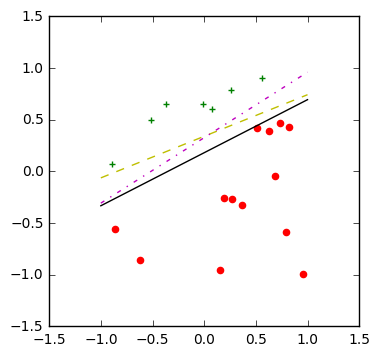

In [4]:
N = 20
X = gen_X(N)
tps = mk_two_points()
W = mk_w(tps)
Y = get_Y(X, W)
draw_points_and_line(X, W)

w_pla = pla(X, Y)
draw_line_from_w(w_pla, 'y--')

w_svm, svc = svm(X[:,1:], Y)
draw_line_from_w(w_svm, 'm-.')

'W =',W, 'w_pla =',w_pla, 'w_svm =',w_svm, "svc=", svc

In [5]:
def err_rate(X_out, Y_out, wg):
    y = get_Y(X_out, wg)
    return (y != Y_out).sum() / len(Y_out)

def pla_vs_svm_run(N):
    '''SVM vs PLA run. Returns (1, svc) if SVM better, otherwise (0, svc), where svc is support vector count.'''
    tps = mk_two_points()
    W = mk_w(tps)

    X = gen_X(N)
    Y = get_Y(X, W)
    
    w_pla = pla(X, Y)
    w_svm, svc = svm(X[:,1:], Y)
    
    X_out = gen_X(500)
    Y_out = get_Y(X_out, W)
    e_pla = err_rate(X_out, Y_out, w_pla)
    e_svm = err_rate(X_out, Y_out, w_svm)

    return [e_pla, e_svm, svc]

In [8]:
count_svm = 0
total = 0
svcs = []
for _ in range(1000):
    try:
        e_pla, e_svm, svc = pla_vs_svm_run(10)
        count_svm += e_pla > e_svm
        svcs.append(svc)
        total += 1
    except:
        pass
count_svm, total, count_svm/total, np.average(svcs)

(571, 909, 0.62816281628162818, 2.8591859185918591)

In [7]:
count_svm = 0
total = 0
svcs = []
for _ in range(1000):
    try:
        e_pla, e_svm, svc = pla_vs_svm_run(100)
        count_svm += e_pla > e_svm
        svcs.append(svc)
        total += 1
    except:
        pass
count_svm, total, count_svm/total, np.average(svcs)

(560, 997, 0.56168505516549649, 3.140421263791374)

> The above result (of `count_svm/total`) is still not quite right.